In [30]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [86]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import contractions
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.zhiliaoapp.musically',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=100, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [3]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fdc87859-c5f6-4848-979d-fa1985225351,Sierra Sky,https://play-lh.googleusercontent.com/a-/ALV-U...,I love the app! I'm looking forward to creatin...,2,6625,32.0.4,2023-11-17 15:48:06,None,NaT,32.0.4
1,ecc39ad3-a6c1-4e50-a246-878d112b9102,Otto Patchen,https://play-lh.googleusercontent.com/a-/ALV-U...,Hardly works most of the time. Tons of scam ac...,1,1412,32.1.5,2023-11-19 23:05:15,None,NaT,32.1.5
2,87e28fe4-4509-4fe4-9144-9db0e5f55e17,S Kholanjani,https://play-lh.googleusercontent.com/a/ACg8oc...,The new update caused a major typing glitch du...,1,5146,32.2.3,2023-11-18 18:15:22,None,NaT,32.2.3
3,e95db79b-0f71-4b9c-aba5-349f7034df06,Hailey Cook,https://play-lh.googleusercontent.com/a-/ALV-U...,I used to have absolutely zero issues with thi...,1,27,32.1.5,2023-11-21 11:34:18,None,NaT,32.1.5
4,178ccdf7-eb8c-4ed6-966c-2fcfdf8eecc7,Nyjah,https://play-lh.googleusercontent.com/a/ACg8oc...,It's little glitches I get after being on ther...,3,1644,32.1.5,2023-11-17 12:43:59,None,NaT,32.1.5


In [4]:
#Run This Code to Sort the Data By Date 

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head(10)

,userName,score,at,content
59,Zain Ali,3,2023-11-21 20:22:31,It's a great rabbit to stambul down. This has ...
82,Lol,2,2023-11-21 16:26:36,"It's good, very addicting, but recently my acc..."
3,Hailey Cook,1,2023-11-21 11:34:18,I used to have absolutely zero issues with thi...
84,Taylor Reeves,2,2023-11-21 11:15:29,"Love the app, truly. But. I can't reset my PAS..."
71,UnabatedCellYT ortiz,3,2023-11-21 06:01:20,"The app is good, but the problem is that it ma..."
35,LADY GODIVA GODGIFU,4,2023-11-21 05:16:40,Can't seem to figure a few things out yet. New...
78,Kayz Edmonds,1,2023-11-21 02:33:57,Glitching. Can't add text-to-speech as text wo...
76,Matthew Schwinn,1,2023-11-21 01:59:50,No Android dark mode for pixel phones. Basic f...
39,Jess Tracey,2,2023-11-20 23:49:26,I found lots of issues recently when editing v...
40,Natalie Wiza,2,2023-11-20 22:58:00,App shuts down automatically when trying to cr...


In [5]:
sorted_df.to_csv('tiktok_scrap.csv', index=False)

### Analysing Text Data in Python

In [2]:
data = pd.read_csv("/Users/user/dying/smt3/tiktok_scrap.csv")


In [3]:
data

,userName,score,at,content
0,Zain Ali,3,2023-11-21 20:22:31,It's a great rabbit to stambul down. This has ...
1,Lol,2,2023-11-21 16:26:36,"It's good, very addicting, but recently my acc..."
2,Hailey Cook,1,2023-11-21 11:34:18,I used to have absolutely zero issues with thi...
3,Taylor Reeves,2,2023-11-21 11:15:29,"Love the app, truly. But. I can't reset my PAS..."
4,UnabatedCellYT ortiz,3,2023-11-21 06:01:20,"The app is good, but the problem is that it ma..."
...,...,...,...,...
95,Md MokbuL,4,2023-08-31 15:13:10,A recent bug is that a lot of time I will tap ...
96,Daniel Marrero,3,2023-08-31 07:53:57,"I wanna give this 5 stars, but recently everyt..."
97,maisy rae,3,2023-08-29 12:04:16,A recent bug is that a lot of time I will tap ...
98,fructoast,2,2023-08-28 12:56:46,Normally it works just fine but recently it ju...


In [4]:
data = data.drop(['userName', 'score', 'at'], axis=1)
data.head()

,content
0,It's a great rabbit to stambul down. This has ...
1,"It's good, very addicting, but recently my acc..."
2,I used to have absolutely zero issues with thi...
3,"Love the app, truly. But. I can't reset my PAS..."
4,"The app is good, but the problem is that it ma..."


In [5]:
data['no_contractions'] = data['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])
data.head(7)

,content,no_contractions
0,It's a great rabbit to stambul down. This has ...,"[It is, a, great, rabbit, to, stambul, down., ..."
1,"It's good, very addicting, but recently my acc...","[It is, good,, very, addicting,, but, recently..."
2,I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ..."
3,"Love the app, truly. But. I can't reset my PAS...","[Love, the, app,, truly., But., I, cannot, res..."
4,"The app is good, but the problem is that it ma...","[The, app, is, good,, but, the, problem, is, t..."
5,Can't seem to figure a few things out yet. New...,"[Cannot, seem, to, figure, a, few, things, out..."
6,Glitching. Can't add text-to-speech as text wo...,"[Glitching., Cannot, add, text-to-speech, as, ..."


In [6]:
data['reviews_no_contractions'] = [' '.join(l) for l in
data['no_contractions']]
data.head(7)

,content,no_contractions,reviews_no_contractions
0,It's a great rabbit to stambul down. This has ...,"[It is, a, great, rabbit, to, stambul, down., ...",It is a great rabbit to stambul down. This has...
1,"It's good, very addicting, but recently my acc...","[It is, good,, very, addicting,, but, recently...","It is good, very addicting, but recently my ac..."
2,I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ...",I used to have absolutely zero issues with thi...
3,"Love the app, truly. But. I can't reset my PAS...","[Love, the, app,, truly., But., I, cannot, res...","Love the app, truly. But. I cannot reset my PA..."
4,"The app is good, but the problem is that it ma...","[The, app, is, good,, but, the, problem, is, t...","The app is good, but the problem is that it ma..."
5,Can't seem to figure a few things out yet. New...,"[Cannot, seem, to, figure, a, few, things, out...",Cannot seem to figure a few things out yet. Ne...
6,Glitching. Can't add text-to-speech as text wo...,"[Glitching., Cannot, add, text-to-speech, as, ...",Glitching. Cannot add text-to-speech as text w...


In [7]:
data['reviews_tokenized'] = data['reviews_no_contractions'].apply(word_tokenize)
data.head()

,content,no_contractions,reviews_no_contractions,reviews_tokenized
0,It's a great rabbit to stambul down. This has ...,"[It is, a, great, rabbit, to, stambul, down., ...",It is a great rabbit to stambul down. This has...,"[It, is, a, great, rabbit, to, stambul, down, ..."
1,"It's good, very addicting, but recently my acc...","[It is, good,, very, addicting,, but, recently...","It is good, very addicting, but recently my ac...","[It, is, good, ,, very, addicting, ,, but, rec..."
2,I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ...",I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ..."
3,"Love the app, truly. But. I can't reset my PAS...","[Love, the, app,, truly., But., I, cannot, res...","Love the app, truly. But. I cannot reset my PA...","[Love, the, app, ,, truly, ., But, ., I, can, ..."
4,"The app is good, but the problem is that it ma...","[The, app, is, good,, but, the, problem, is, t...","The app is good, but the problem is that it ma...","[The, app, is, good, ,, but, the, problem, is,..."


In [8]:
data['reviews_lower'] = data['reviews_tokenized'].apply(lambda x: [word.lower() for word in x])
data.head()

,content,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower
0,It's a great rabbit to stambul down. This has ...,"[It is, a, great, rabbit, to, stambul, down., ...",It is a great rabbit to stambul down. This has...,"[It, is, a, great, rabbit, to, stambul, down, ...","[it, is, a, great, rabbit, to, stambul, down, ..."
1,"It's good, very addicting, but recently my acc...","[It is, good,, very, addicting,, but, recently...","It is good, very addicting, but recently my ac...","[It, is, good, ,, very, addicting, ,, but, rec...","[it, is, good, ,, very, addicting, ,, but, rec..."
2,I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ...",I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ...","[i, used, to, have, absolutely, zero, issues, ..."
3,"Love the app, truly. But. I can't reset my PAS...","[Love, the, app,, truly., But., I, cannot, res...","Love the app, truly. But. I cannot reset my PA...","[Love, the, app, ,, truly, ., But, ., I, can, ...","[love, the, app, ,, truly, ., but, ., i, can, ..."
4,"The app is good, but the problem is that it ma...","[The, app, is, good,, but, the, problem, is, t...","The app is good, but the problem is that it ma...","[The, app, is, good, ,, but, the, problem, is,...","[the, app, is, good, ,, but, the, problem, is,..."


In [9]:
punctuations = string.punctuation
data['reviews_no_punctuation'] = data['reviews_lower'].apply(lambda x: [word for word in x if word not in punctuations])
data.head()

,content,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation
0,It's a great rabbit to stambul down. This has ...,"[It is, a, great, rabbit, to, stambul, down., ...",It is a great rabbit to stambul down. This has...,"[It, is, a, great, rabbit, to, stambul, down, ...","[it, is, a, great, rabbit, to, stambul, down, ...","[it, is, a, great, rabbit, to, stambul, down, ..."
1,"It's good, very addicting, but recently my acc...","[It is, good,, very, addicting,, but, recently...","It is good, very addicting, but recently my ac...","[It, is, good, ,, very, addicting, ,, but, rec...","[it, is, good, ,, very, addicting, ,, but, rec...","[it, is, good, very, addicting, but, recently,..."
2,I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ...",I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ...","[i, used, to, have, absolutely, zero, issues, ...","[i, used, to, have, absolutely, zero, issues, ..."
3,"Love the app, truly. But. I can't reset my PAS...","[Love, the, app,, truly., But., I, cannot, res...","Love the app, truly. But. I cannot reset my PA...","[Love, the, app, ,, truly, ., But, ., I, can, ...","[love, the, app, ,, truly, ., but, ., i, can, ...","[love, the, app, truly, but, i, can, not, rese..."
4,"The app is good, but the problem is that it ma...","[The, app, is, good,, but, the, problem, is, t...","The app is good, but the problem is that it ma...","[The, app, is, good, ,, but, the, problem, is,...","[the, app, is, good, ,, but, the, problem, is,...","[the, app, is, good, but, the, problem, is, th..."


In [10]:
data['reviews_cleaned'] = [' '.join(l) for l in data['reviews_no_punctuation']]
data.head()

,content,no_contractions,reviews_no_contractions,reviews_tokenized,reviews_lower,reviews_no_punctuation,reviews_cleaned
0,It's a great rabbit to stambul down. This has ...,"[It is, a, great, rabbit, to, stambul, down., ...",It is a great rabbit to stambul down. This has...,"[It, is, a, great, rabbit, to, stambul, down, ...","[it, is, a, great, rabbit, to, stambul, down, ...","[it, is, a, great, rabbit, to, stambul, down, ...",it is a great rabbit to stambul down this has ...
1,"It's good, very addicting, but recently my acc...","[It is, good,, very, addicting,, but, recently...","It is good, very addicting, but recently my ac...","[It, is, good, ,, very, addicting, ,, but, rec...","[it, is, good, ,, very, addicting, ,, but, rec...","[it, is, good, very, addicting, but, recently,...",it is good very addicting but recently my acco...
2,I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ...",I used to have absolutely zero issues with thi...,"[I, used, to, have, absolutely, zero, issues, ...","[i, used, to, have, absolutely, zero, issues, ...","[i, used, to, have, absolutely, zero, issues, ...",i used to have absolutely zero issues with thi...
3,"Love the app, truly. But. I can't reset my PAS...","[Love, the, app,, truly., But., I, cannot, res...","Love the app, truly. But. I cannot reset my PA...","[Love, the, app, ,, truly, ., But, ., I, can, ...","[love, the, app, ,, truly, ., but, ., i, can, ...","[love, the, app, truly, but, i, can, not, rese...",love the app truly but i can not reset my pass...
4,"The app is good, but the problem is that it ma...","[The, app, is, good,, but, the, problem, is, t...","The app is good, but the problem is that it ma...","[The, app, is, good, ,, but, the, problem, is,...","[the, app, is, good, ,, but, the, problem, is,...","[the, app, is, good, but, the, problem, is, th...",the app is good but the problem is that it mak...


### Dealing with stop words

In [11]:
df = data[["content","reviews_cleaned"]]
df.head()

,content,reviews_cleaned
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...


In [12]:
df['reviews_tokenized'] = df['reviews_cleaned'].apply(word_tokenize)

/var/folders/xk/lf4dgvnn4zs8j5w92lqxxk2r0000gn/T/ipykernel_1732/2258905776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_tokenized'] = df['reviews_cleaned'].apply(word_tokenize)


In [13]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [14]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [15]:
reviews = df['reviews_tokenized']
reviews_words =  combine_words(reviews)
reviews_words[:10]

['it', 'is', 'a', 'great', 'rabbit', 'to', 'stambul', 'down', 'this', 'has']

In [16]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
14,the,354
22,i,335
0,it,279
5,to,279
48,and,225


<Axes: xlabel='words', ylabel='word_count'>

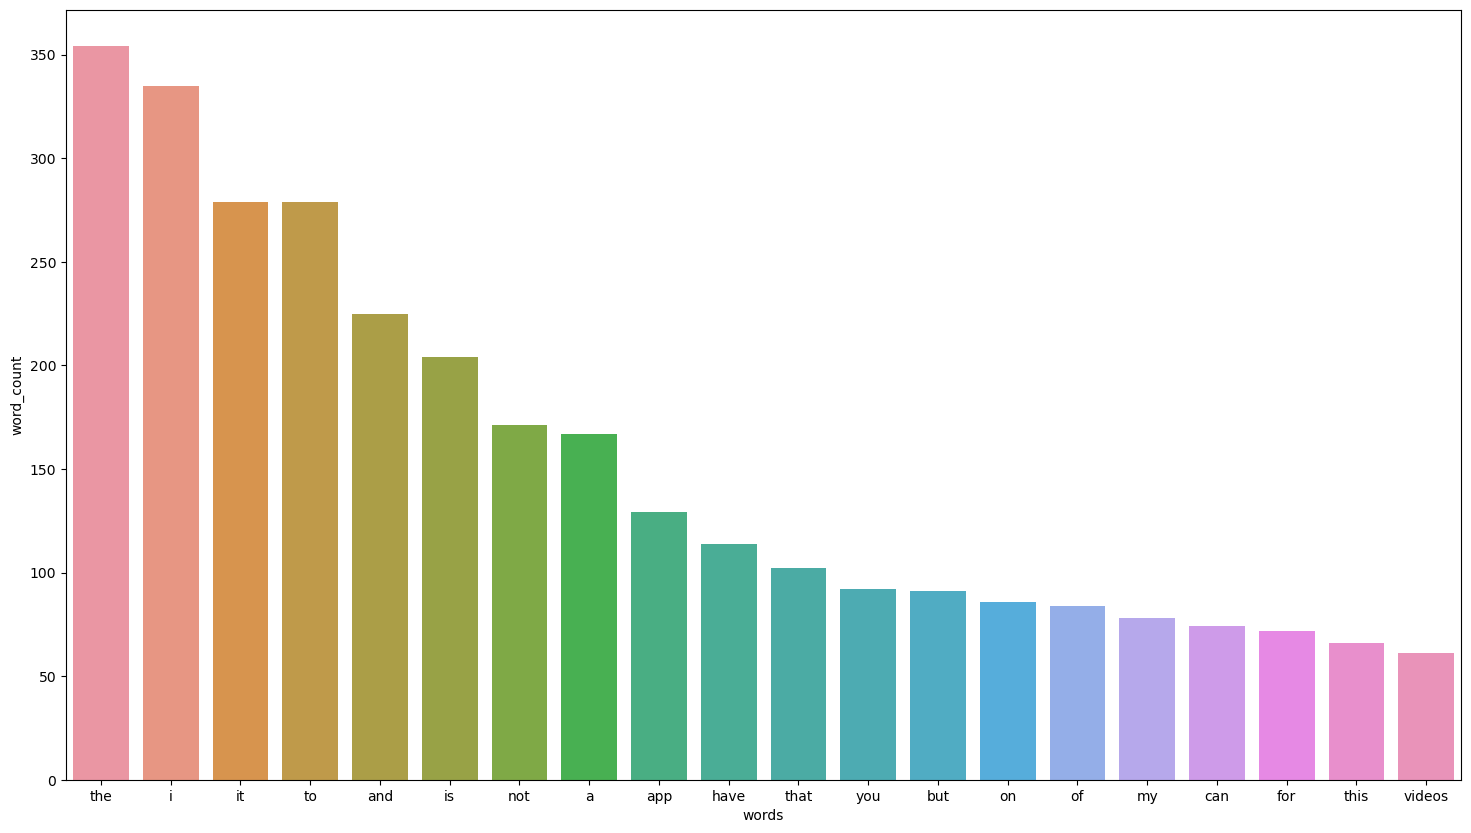

In [17]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

In [18]:
stop_words = set(stopwords.words('english'))
df['reviews_no_stopwords'] = df['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

/var/folders/xk/lf4dgvnn4zs8j5w92lqxxk2r0000gn/T/ipykernel_1732/2681502915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_no_stopwords'] = df['reviews_tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


,content,reviews_cleaned,reviews_tokenized,reviews_no_stopwords
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,"[it, is, a, great, rabbit, to, stambul, down, ...","[great, rabbit, stambul, kept, entertained, in..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,"[it, is, good, very, addicting, but, recently,...","[good, addicting, recently, account, lost, abi..."
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,"[i, used, to, have, absolutely, zero, issues, ...","[used, absolutely, zero, issues, app, loved, e..."
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,"[love, the, app, truly, but, i, can, not, rese...","[love, app, truly, reset, password, tried, log..."
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,"[the, app, is, good, but, the, problem, is, th...","[app, good, problem, makes, edits, laggy, make..."


In [19]:
df['reviews_cleaned_stopwords'] = [' '.join(l) for l in df['reviews_no_stopwords']]
df.head()

/var/folders/xk/lf4dgvnn4zs8j5w92lqxxk2r0000gn/T/ipykernel_1732/466252226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_cleaned_stopwords'] = [' '.join(l) for l in df['reviews_no_stopwords']]


,content,reviews_cleaned,reviews_tokenized,reviews_no_stopwords,reviews_cleaned_stopwords
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,"[it, is, a, great, rabbit, to, stambul, down, ...","[great, rabbit, stambul, kept, entertained, in...",great rabbit stambul kept entertained inapprop...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,"[it, is, good, very, addicting, but, recently,...","[good, addicting, recently, account, lost, abi...",good addicting recently account lost ability s...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,"[i, used, to, have, absolutely, zero, issues, ...","[used, absolutely, zero, issues, app, loved, e...",used absolutely zero issues app loved even rec...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,"[love, the, app, truly, but, i, can, not, rese...","[love, app, truly, reset, password, tried, log...",love app truly reset password tried login stil...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,"[the, app, is, good, but, the, problem, is, th...","[app, good, problem, makes, edits, laggy, make...",app good problem makes edits laggy makes quali...


In [20]:
reviews_no_stopwords = df['reviews_no_stopwords'] 
reviews_words = combine_words(reviews_no_stopwords) 
reviews_words[:10]

['great',
 'rabbit',
 'stambul',
 'kept',
 'entertained',
 'inappropriate',
 'times',
 'lately',
 'issue',
 'poetry']

In [21]:
reviews_topword_count = count_topwords (reviews_words)
reviews_topword_count = reviews_topword_count[reviews_topword_count['words'] != '``']
reviews_topword_count.head ()

,words,word_count
56,app,129
39,videos,61
71,video,51
42,tiktok,47
201,time,36


<Axes: xlabel='words', ylabel='word_count'>

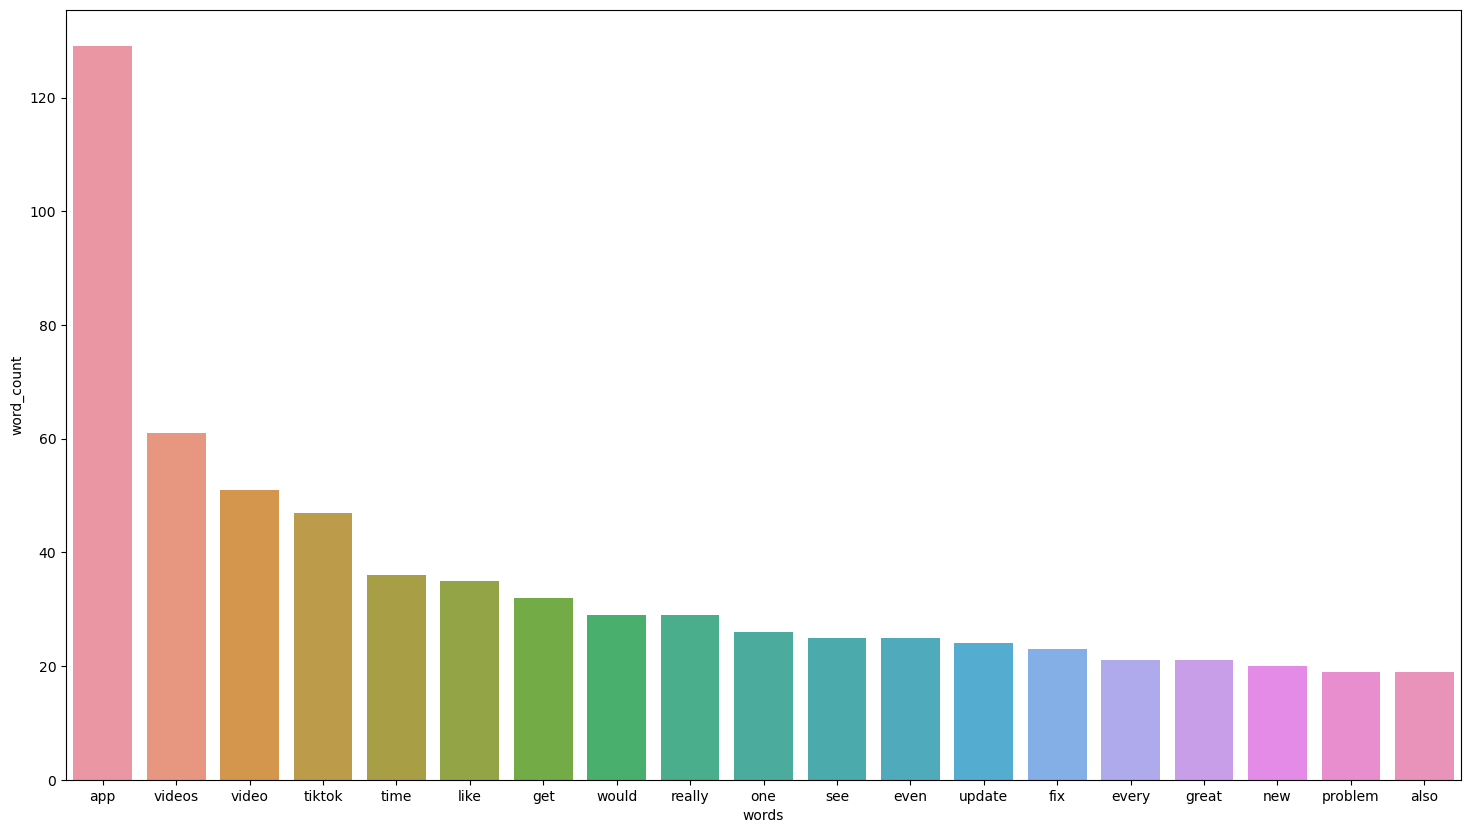

In [22]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

### Analyzing part of speech

In [23]:
df.head()

,content,reviews_cleaned,reviews_tokenized,reviews_no_stopwords,reviews_cleaned_stopwords
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,"[it, is, a, great, rabbit, to, stambul, down, ...","[great, rabbit, stambul, kept, entertained, in...",great rabbit stambul kept entertained inapprop...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,"[it, is, good, very, addicting, but, recently,...","[good, addicting, recently, account, lost, abi...",good addicting recently account lost ability s...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,"[i, used, to, have, absolutely, zero, issues, ...","[used, absolutely, zero, issues, app, loved, e...",used absolutely zero issues app loved even rec...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,"[love, the, app, truly, but, i, can, not, rese...","[love, app, truly, reset, password, tried, log...",love app truly reset password tried login stil...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,"[the, app, is, good, but, the, problem, is, th...","[app, good, problem, makes, edits, laggy, make...",app good problem makes edits laggy makes quali...


In [24]:
df1 = df[["content","reviews_cleaned", "reviews_tokenized", "reviews_cleaned_stopwords"]]
df1

,content,reviews_cleaned,reviews_tokenized,reviews_cleaned_stopwords
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,"[it, is, a, great, rabbit, to, stambul, down, ...",great rabbit stambul kept entertained inapprop...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,"[it, is, good, very, addicting, but, recently,...",good addicting recently account lost ability s...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,"[i, used, to, have, absolutely, zero, issues, ...",used absolutely zero issues app loved even rec...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,"[love, the, app, truly, but, i, can, not, rese...",love app truly reset password tried login stil...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,"[the, app, is, good, but, the, problem, is, th...",app good problem makes edits laggy makes quali...
...,...,...,...,...
95,A recent bug is that a lot of time I will tap ...,a recent bug is that a lot of time i will tap ...,"[a, recent, bug, is, that, a, lot, of, time, i...",recent bug lot time tap app home screen refuse...
96,"I wanna give this 5 stars, but recently everyt...",i want to give this 5 stars but recently every...,"[i, want, to, give, this, 5, stars, but, recen...",want give 5 stars recently everytime make cove...
97,A recent bug is that a lot of time I will tap ...,a recent bug is that a lot of time i will tap ...,"[a, recent, bug, is, that, a, lot, of, time, i...",recent bug lot time tap app home screen refuse...
98,Normally it works just fine but recently it ju...,normally it works just fine but recently it ju...,"[normally, it, works, just, fine, but, recentl...",normally works fine recently opening press ico...


In [25]:
df1['reviews_tokenized'] = df1['reviews_cleaned_stopwords'].apply(word_tokenize)

/var/folders/xk/lf4dgvnn4zs8j5w92lqxxk2r0000gn/T/ipykernel_1732/3235489717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['reviews_tokenized'] = df1['reviews_cleaned_stopwords'].apply(word_tokenize)


In [26]:
df1['reviews_pos_tags'] = df1['reviews_tokenized'].apply(nltk.tag.pos_tag)
df1.head()

,content,reviews_cleaned,reviews_tokenized,reviews_cleaned_stopwords,reviews_pos_tags
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,"[great, rabbit, stambul, kept, entertained, in...",great rabbit stambul kept entertained inapprop...,"[(great, JJ), (rabbit, NN), (stambul, JJ), (ke..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,"[good, addicting, recently, account, lost, abi...",good addicting recently account lost ability s...,"[(good, JJ), (addicting, VBG), (recently, RB),..."
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,"[used, absolutely, zero, issues, app, loved, e...",used absolutely zero issues app loved even rec...,"[(used, VBN), (absolutely, RB), (zero, CD), (i..."
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,"[love, app, truly, reset, password, tried, log...",love app truly reset password tried login stil...,"[(love, VB), (app, NN), (truly, RB), (reset, J..."
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,"[app, good, problem, makes, edits, laggy, make...",app good problem makes edits laggy makes quali...,"[(app, RB), (good, JJ), (problem, NN), (makes,..."


In [27]:
df1['reviews_adjectives'] = df1['reviews_pos_tags'].apply(lambda x: [word for (word, pos_tag) in x if 'JJ' in (word, pos_tag)])

In [28]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [29]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [30]:
reviews = df1['reviews_adjectives'] 
reviews_words = combine_words(reviews) 
reviews_words[:10]

['great',
 'stambul',
 'entertained',
 'inappropriate',
 'ontop',
 'live',
 'hear',
 'second',
 'help',
 'much']

In [31]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
53,app,30
0,great,21
117,update,20
19,new,20
60,open,18


<Axes: xlabel='words', ylabel='word_count'>

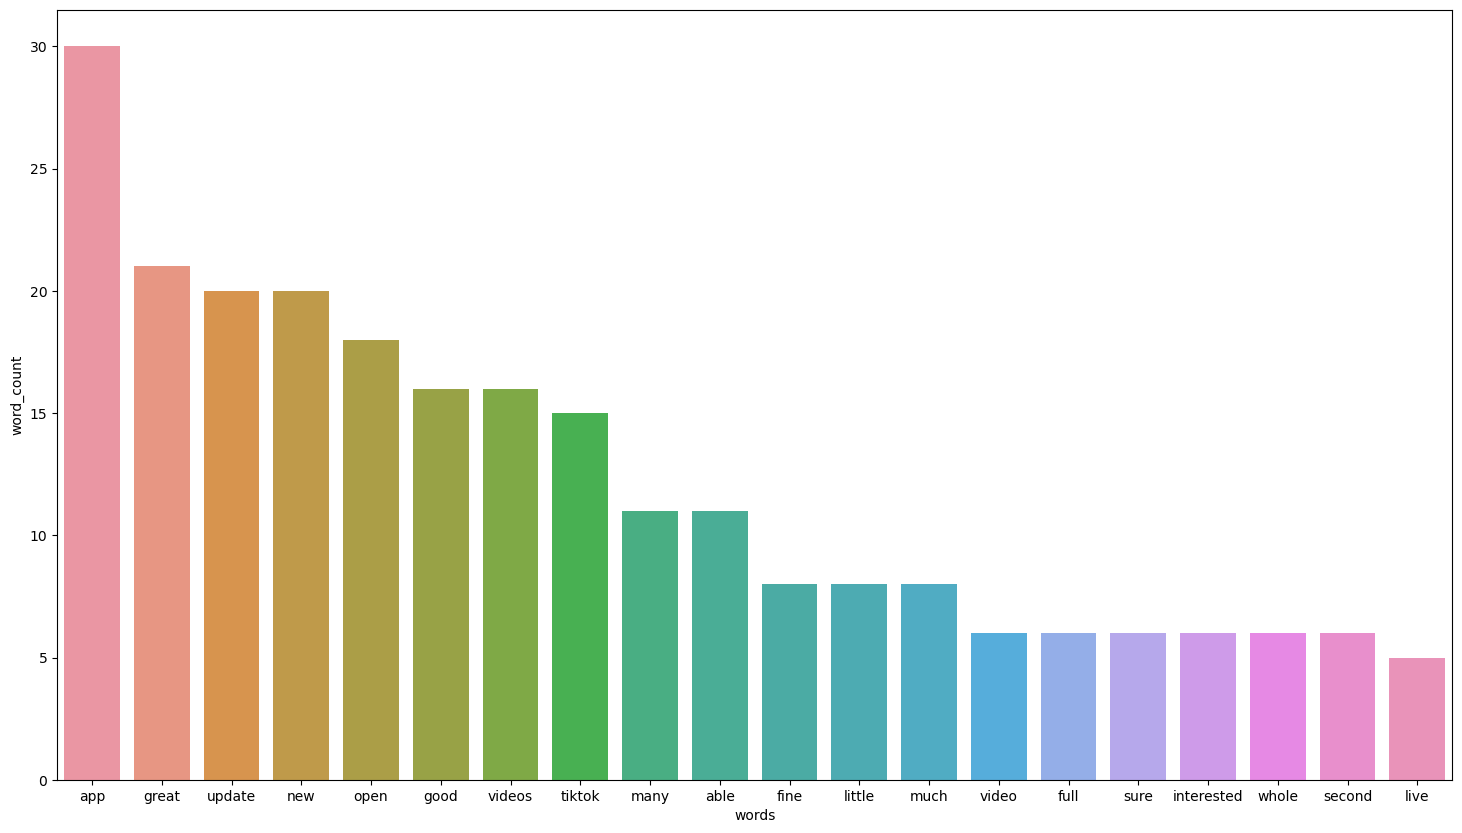

In [32]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

### Performing stemming and lemmatization

In [39]:
df1.head()

,content,reviews_cleaned,reviews_tokenized,reviews_cleaned_stopwords,reviews_pos_tags,reviews_adjectives
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,"[great, rabbit, stambul, kept, entertained, in...",great rabbit stambul kept entertained inapprop...,"[(great, JJ), (rabbit, NN), (stambul, JJ), (ke...","[great, stambul, entertained, inappropriate, o..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,"[good, addicting, recently, account, lost, abi...",good addicting recently account lost ability s...,"[(good, JJ), (addicting, VBG), (recently, RB),...","[good, videos, sure]"
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,"[used, absolutely, zero, issues, app, loved, e...",used absolutely zero issues app loved even rec...,"[(used, VBN), (absolutely, RB), (zero, CD), (i...","[able, mine, numerous, different, fix]"
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,"[love, app, truly, reset, password, tried, log...",love app truly reset password tried login stil...,"[(love, VB), (app, NN), (truly, RB), (reset, J...","[reset, new, top, re-follow, find]"
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,"[app, good, problem, makes, edits, laggy, make...",app good problem makes edits laggy makes quali...,"[(app, RB), (good, JJ), (problem, NN), (makes,...","[good, laggy, bad, slideshow, confused, mad, t..."


In [40]:
df2 = df1[["content","reviews_cleaned","reviews_cleaned_stopwords"]]
df2 = df2.dropna()
df2.head()

,content,reviews_cleaned,reviews_cleaned_stopwords
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...


In [41]:
df2['reviews_tokenized'] = df2['reviews_cleaned_stopwords'].apply(word_tokenize)

In [42]:
stemmer = nltk.PorterStemmer()
df2['reviews_stemmed_data'] = df2['reviews_tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
df2.head()

,content,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...,"[great, rabbit, stambul, kept, entertained, in...","[great, rabbit, stambul, kept, entertain, inap..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...,"[good, addicting, recently, account, lost, abi...","[good, addict, recent, account, lost, abil, se..."
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...,"[used, absolutely, zero, issues, app, loved, e...","[use, absolut, zero, issu, app, love, even, re..."
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...,"[love, app, truly, reset, password, tried, log...","[love, app, truli, reset, password, tri, login..."
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...,"[app, good, problem, makes, edits, laggy, make...","[app, good, problem, make, edit, laggi, make, ..."


In [43]:
df2['reviews_pos_tags'] = df2['reviews_tokenized'].apply(nltk.tag.pos_tag)
df2.head()

,content,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...,"[great, rabbit, stambul, kept, entertained, in...","[great, rabbit, stambul, kept, entertain, inap...","[(great, JJ), (rabbit, NN), (stambul, JJ), (ke..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...,"[good, addicting, recently, account, lost, abi...","[good, addict, recent, account, lost, abil, se...","[(good, JJ), (addicting, VBG), (recently, RB),..."
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...,"[used, absolutely, zero, issues, app, loved, e...","[use, absolut, zero, issu, app, love, even, re...","[(used, VBN), (absolutely, RB), (zero, CD), (i..."
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...,"[love, app, truly, reset, password, tried, log...","[love, app, truli, reset, password, tri, login...","[(love, VB), (app, NN), (truly, RB), (reset, J..."
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...,"[app, good, problem, makes, edits, laggy, make...","[app, good, problem, make, edit, laggi, make, ...","[(app, RB), (good, JJ), (problem, NN), (makes,..."


In [51]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [52]:
df2['reviews_wordnet_pos_tags'] = df2['reviews_pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df2.head()

,content,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...,"[great, rabbit, stambul, kept, entertained, in...","[great, rabbit, stambul, kept, entertain, inap...","[(great, JJ), (rabbit, NN), (stambul, JJ), (ke...","[(great, a), (rabbit, n), (stambul, a), (kept,..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...,"[good, addicting, recently, account, lost, abi...","[good, addict, recent, account, lost, abil, se...","[(good, JJ), (addicting, VBG), (recently, RB),...","[(good, a), (addicting, v), (recently, r), (ac..."
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...,"[used, absolutely, zero, issues, app, loved, e...","[use, absolut, zero, issu, app, love, even, re...","[(used, VBN), (absolutely, RB), (zero, CD), (i...","[(used, v), (absolutely, r), (zero, n), (issue..."
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...,"[love, app, truly, reset, password, tried, log...","[love, app, truli, reset, password, tri, login...","[(love, VB), (app, NN), (truly, RB), (reset, J...","[(love, v), (app, n), (truly, r), (reset, a), ..."
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...,"[app, good, problem, makes, edits, laggy, make...","[app, good, problem, make, edit, laggi, make, ...","[(app, RB), (good, JJ), (problem, NN), (makes,...","[(app, r), (good, a), (problem, n), (makes, v)..."


In [53]:
lemmatizer = WordNetLemmatizer()
df2['reviews_lemmatized'] = df2['reviews_wordnet_pos_tags'].apply(lambda x: [lemmatizer.lemmatize(word,tag) for word, tag in x])
df2.head()

,content,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...,"[great, rabbit, stambul, kept, entertained, in...","[great, rabbit, stambul, kept, entertain, inap...","[(great, JJ), (rabbit, NN), (stambul, JJ), (ke...","[(great, a), (rabbit, n), (stambul, a), (kept,...","[great, rabbit, stambul, keep, entertained, in..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...,"[good, addicting, recently, account, lost, abi...","[good, addict, recent, account, lost, abil, se...","[(good, JJ), (addicting, VBG), (recently, RB),...","[(good, a), (addicting, v), (recently, r), (ac...","[good, addict, recently, account, lose, abilit..."
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...,"[used, absolutely, zero, issues, app, loved, e...","[use, absolut, zero, issu, app, love, even, re...","[(used, VBN), (absolutely, RB), (zero, CD), (i...","[(used, v), (absolutely, r), (zero, n), (issue...","[use, absolutely, zero, issue, app, love, even..."
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...,"[love, app, truly, reset, password, tried, log...","[love, app, truli, reset, password, tri, login...","[(love, VB), (app, NN), (truly, RB), (reset, J...","[(love, v), (app, n), (truly, r), (reset, a), ...","[love, app, truly, reset, password, try, login..."
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...,"[app, good, problem, makes, edits, laggy, make...","[app, good, problem, make, edit, laggi, make, ...","[(app, RB), (good, JJ), (problem, NN), (makes,...","[(app, r), (good, a), (problem, n), (makes, v)...","[app, good, problem, make, edits, laggy, make,..."


In [55]:
df2['reviews_cleaned_lemmatized'] = [' '.join(l) for l in df2['reviews_lemmatized']]
df2.head()

,content,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized,reviews_cleaned_lemmatized
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...,"[great, rabbit, stambul, kept, entertained, in...","[great, rabbit, stambul, kept, entertain, inap...","[(great, JJ), (rabbit, NN), (stambul, JJ), (ke...","[(great, a), (rabbit, n), (stambul, a), (kept,...","[great, rabbit, stambul, keep, entertained, in...",great rabbit stambul keep entertained inapprop...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...,"[good, addicting, recently, account, lost, abi...","[good, addict, recent, account, lost, abil, se...","[(good, JJ), (addicting, VBG), (recently, RB),...","[(good, a), (addicting, v), (recently, r), (ac...","[good, addict, recently, account, lose, abilit...",good addict recently account lose ability send...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...,"[used, absolutely, zero, issues, app, loved, e...","[use, absolut, zero, issu, app, love, even, re...","[(used, VBN), (absolutely, RB), (zero, CD), (i...","[(used, v), (absolutely, r), (zero, n), (issue...","[use, absolutely, zero, issue, app, love, even...",use absolutely zero issue app love even recent...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...,"[love, app, truly, reset, password, tried, log...","[love, app, truli, reset, password, tri, login...","[(love, VB), (app, NN), (truly, RB), (reset, J...","[(love, v), (app, n), (truly, r), (reset, a), ...","[love, app, truly, reset, password, try, login...",love app truly reset password try login still ...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...,"[app, good, problem, makes, edits, laggy, make...","[app, good, problem, make, edit, laggi, make, ...","[(app, RB), (good, JJ), (problem, NN), (makes,...","[(app, r), (good, a), (problem, n), (makes, v)...","[app, good, problem, make, edits, laggy, make,...",app good problem make edits laggy make quality...


In [56]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [58]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:20]

In [59]:
reviews = df2['reviews_lemmatized'] 
reviews_words = combine_words(reviews) 
reviews_words[:10]

['great',
 'rabbit',
 'stambul',
 'keep',
 'entertained',
 'inappropriate',
 'time',
 'lately',
 'issue',
 'poetry']

In [65]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count = reviews_topword_count[reviews_topword_count['words'] != '``']
reviews_topword_count.head ()

,words,word_count
56,app,129
39,video,88
66,get,52
6,time,48
42,tiktok,47


<Axes: xlabel='words', ylabel='word_count'>

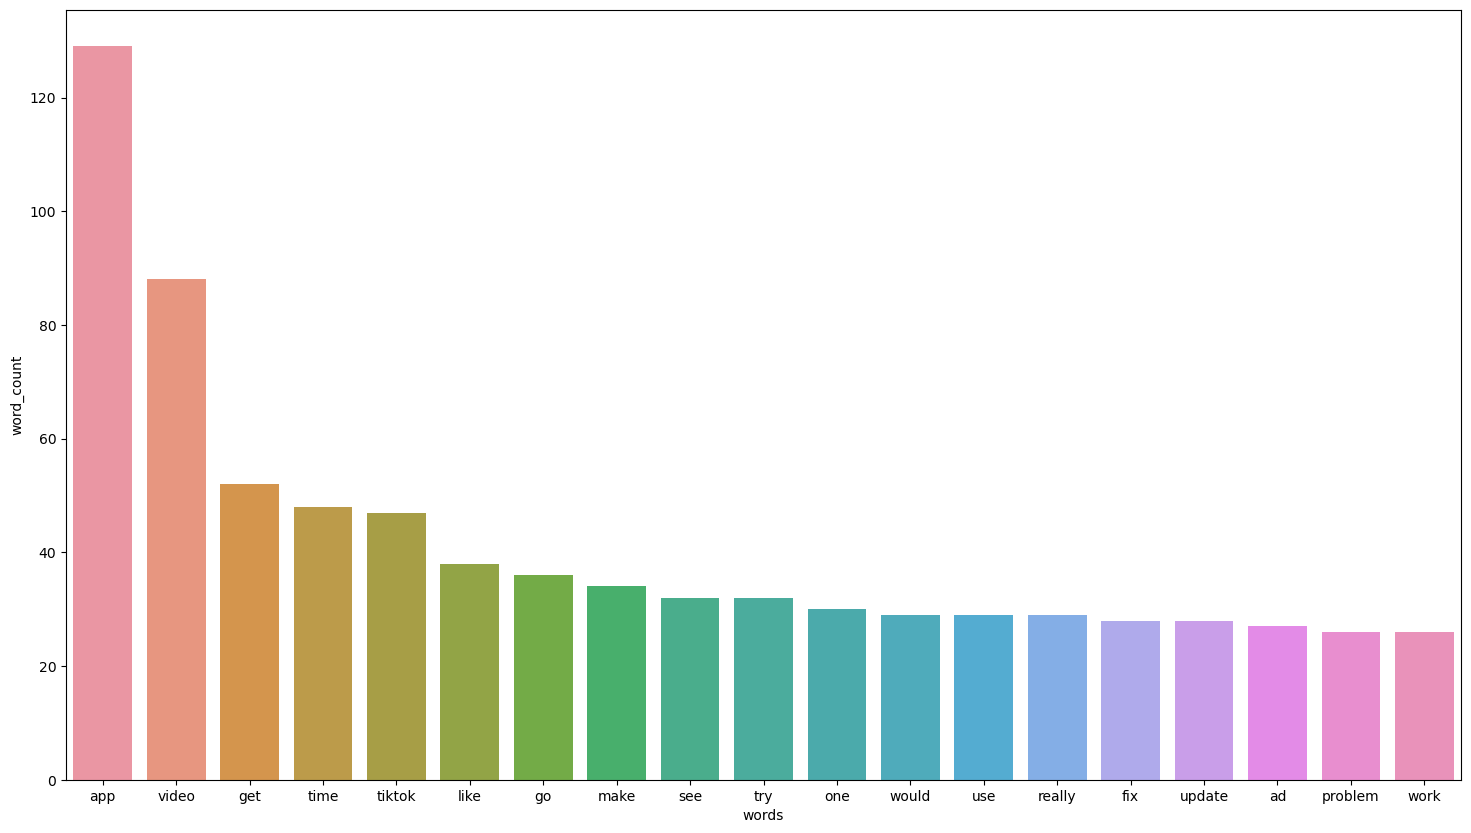

In [66]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

### Analyzing ngrams

In [68]:
df1.head()

,content,reviews_cleaned,reviews_tokenized,reviews_cleaned_stopwords,reviews_pos_tags,reviews_adjectives
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,"[great, rabbit, stambul, kept, entertained, in...",great rabbit stambul kept entertained inapprop...,"[(great, JJ), (rabbit, NN), (stambul, JJ), (ke...","[great, stambul, entertained, inappropriate, o..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,"[good, addicting, recently, account, lost, abi...",good addicting recently account lost ability s...,"[(good, JJ), (addicting, VBG), (recently, RB),...","[good, videos, sure]"
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,"[used, absolutely, zero, issues, app, loved, e...",used absolutely zero issues app loved even rec...,"[(used, VBN), (absolutely, RB), (zero, CD), (i...","[able, mine, numerous, different, fix]"
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,"[love, app, truly, reset, password, tried, log...",love app truly reset password tried login stil...,"[(love, VB), (app, NN), (truly, RB), (reset, J...","[reset, new, top, re-follow, find]"
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,"[app, good, problem, makes, edits, laggy, make...",app good problem makes edits laggy makes quali...,"[(app, RB), (good, JJ), (problem, NN), (makes,...","[good, laggy, bad, slideshow, confused, mad, t..."


In [70]:
df3=df1[["content", "reviews_cleaned", "reviews_cleaned_stopwords"]]
df3.head()

,content,reviews_cleaned,reviews_cleaned_stopwords
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...


In [73]:
df3['reviews_tokenized'] = df3['reviews_cleaned_stopwords'].apply(word_tokenize)

/var/folders/xk/lf4dgvnn4zs8j5w92lqxxk2r0000gn/T/ipykernel_1732/3544591647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['reviews_tokenized'] = df3['reviews_cleaned_stopwords'].apply(word_tokenize)


In [74]:
def extract_ngrams(tokenized_data,n):
    ngrams_list = list(nltk.ngrams(tokenized_data, n))
    ngrams_str = [' '.join(grams) for grams in ngrams_list]
    return ngrams_str

In [77]:
df3['reviews_ngrams'] = df3['reviews_tokenized'].apply(lambda x: extract_ngrams(x, 2))
df3.head()

/var/folders/xk/lf4dgvnn4zs8j5w92lqxxk2r0000gn/T/ipykernel_1732/428096467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['reviews_ngrams'] = df3['reviews_tokenized'].apply(lambda x: extract_ngrams(x, 2))


,content,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_ngrams
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...,"[great, rabbit, stambul, kept, entertained, in...","[great rabbit, rabbit stambul, stambul kept, k..."
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...,"[good, addicting, recently, account, lost, abi...","[good addicting, addicting recently, recently ..."
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...,"[used, absolutely, zero, issues, app, loved, e...","[used absolutely, absolutely zero, zero issues..."
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...,"[love, app, truly, reset, password, tried, log...","[love app, app truly, truly reset, reset passw..."
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...,"[app, good, problem, makes, edits, laggy, make...","[app good, good problem, problem makes, makes ..."


In [78]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [80]:
def count_topwords(all_words):
    counts = dict()
    for word in all_words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    word_count = pd.DataFrame([counts])
    word_count_transposed = word_count.T.reset_index()
    word_count_transposed.columns = ['words','word_count']
    word_count_sorted = word_count_transposed.sort_values("word_count",ascending = False)
    word_count_sorted
    return word_count_sorted[:10]

In [82]:
reviews = df3['reviews_ngrams'] 
reviews_words = combine_words(reviews) 
reviews_words[:10]

['great rabbit',
 'rabbit stambul',
 'stambul kept',
 'kept entertained',
 'entertained inappropriate',
 'inappropriate times',
 'times lately',
 'lately issue',
 'issue poetry',
 'poetry files']

In [83]:
reviews_topword_count = count_topwords(reviews_words)
reviews_topword_count.head()

,words,word_count
145,please fix,9
2142,tik tok,6
180,would like,6
91,love app,6
72,really annoying,6


<Axes: xlabel='words', ylabel='word_count'>

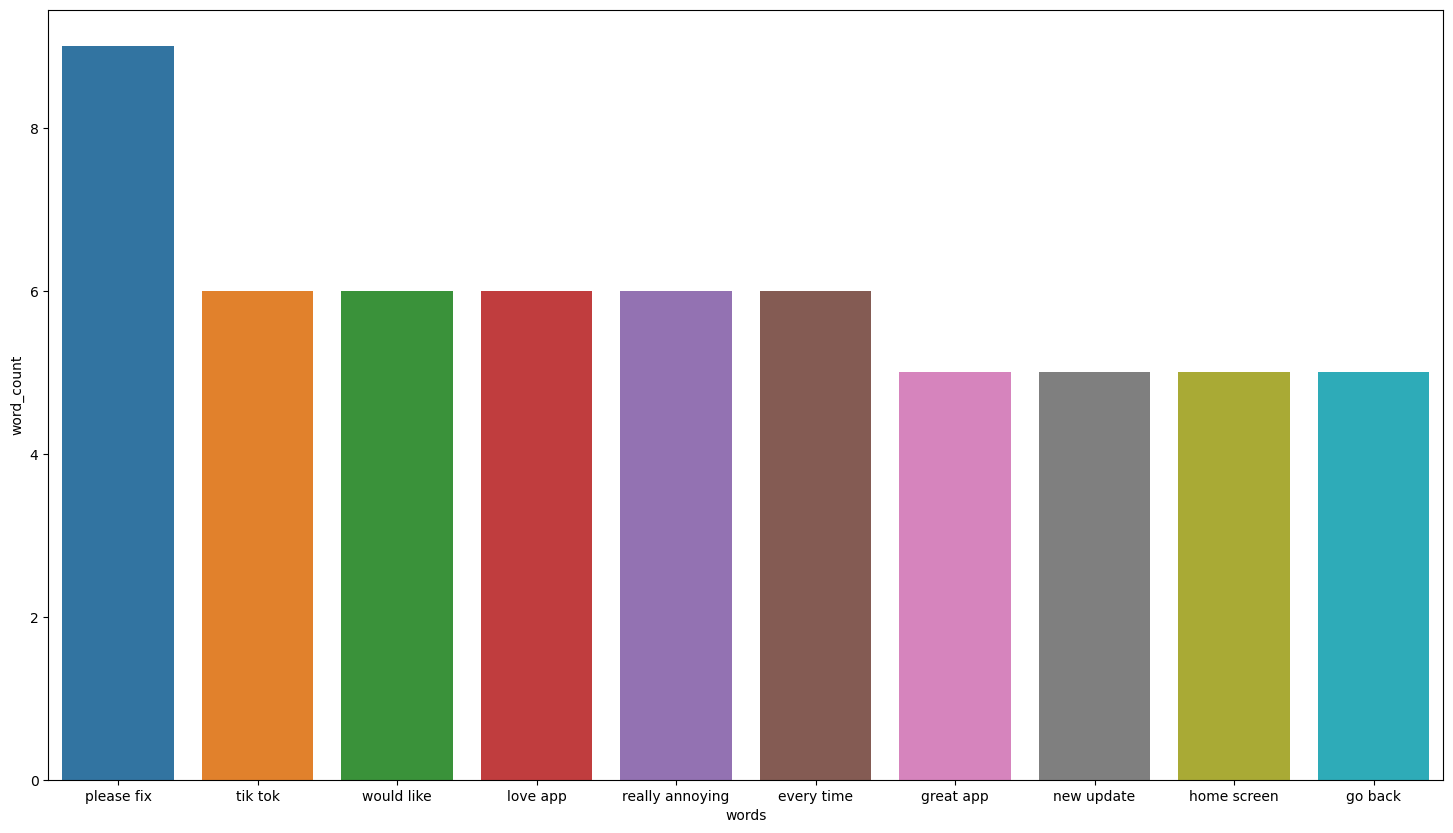

In [84]:
plt.figure(figsize= (18,10))
sns.barplot(data = reviews_topword_count ,x= reviews_topword_count['words'], y= reviews_topword_count['word_count'] )

### word clouds

In [90]:
df2.head()

,content,reviews_cleaned,reviews_cleaned_stopwords,reviews_tokenized,reviews_stemmed_data,reviews_pos_tags,reviews_wordnet_pos_tags,reviews_lemmatized,reviews_cleaned_lemmatized
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul kept entertained inapprop...,"[great, rabbit, stambul, kept, entertained, in...","[great, rabbit, stambul, kept, entertain, inap...","[(great, JJ), (rabbit, NN), (stambul, JJ), (ke...","[(great, a), (rabbit, n), (stambul, a), (kept,...","[great, rabbit, stambul, keep, entertained, in...",great rabbit stambul keep entertained inapprop...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addicting recently account lost ability s...,"[good, addicting, recently, account, lost, abi...","[good, addict, recent, account, lost, abil, se...","[(good, JJ), (addicting, VBG), (recently, RB),...","[(good, a), (addicting, v), (recently, r), (ac...","[good, addict, recently, account, lose, abilit...",good addict recently account lose ability send...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,used absolutely zero issues app loved even rec...,"[used, absolutely, zero, issues, app, loved, e...","[use, absolut, zero, issu, app, love, even, re...","[(used, VBN), (absolutely, RB), (zero, CD), (i...","[(used, v), (absolutely, r), (zero, n), (issue...","[use, absolutely, zero, issue, app, love, even...",use absolutely zero issue app love even recent...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password tried login stil...,"[love, app, truly, reset, password, tried, log...","[love, app, truli, reset, password, tri, login...","[(love, VB), (app, NN), (truly, RB), (reset, J...","[(love, v), (app, n), (truly, r), (reset, a), ...","[love, app, truly, reset, password, try, login...",love app truly reset password try login still ...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem makes edits laggy makes quali...,"[app, good, problem, makes, edits, laggy, make...","[app, good, problem, make, edit, laggi, make, ...","[(app, RB), (good, JJ), (problem, NN), (makes,...","[(app, r), (good, a), (problem, n), (makes, v)...","[app, good, problem, make, edits, laggy, make,...",app good problem make edits laggy make quality...


In [95]:
df4 = df2[["content", "reviews_cleaned", "reviews_cleaned_lemmatized"]]
df4.head()

,content,reviews_cleaned,reviews_cleaned_lemmatized
0,It's a great rabbit to stambul down. This has ...,it is a great rabbit to stambul down this has ...,great rabbit stambul keep entertained inapprop...
1,"It's good, very addicting, but recently my acc...",it is good very addicting but recently my acco...,good addict recently account lose ability send...
2,I used to have absolutely zero issues with thi...,i used to have absolutely zero issues with thi...,use absolutely zero issue app love even recent...
3,"Love the app, truly. But. I can't reset my PAS...",love the app truly but i can not reset my pass...,love app truly reset password try login still ...
4,"The app is good, but the problem is that it ma...",the app is good but the problem is that it mak...,app good problem make edits laggy make quality...


In [96]:
df4['reviews_tokenized'] = df4['reviews_cleaned_lemmatized'].apply(word_tokenize)

/var/folders/xk/lf4dgvnn4zs8j5w92lqxxk2r0000gn/T/ipykernel_1732/2056595239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['reviews_tokenized'] = df4['reviews_cleaned_lemmatized'].apply(word_tokenize)


In [97]:
def combine_words(word_list):
    all_words = []
    for word in word_list:
        all_words += word
    return all_words

In [98]:
reviews = df4['reviews_tokenized'] 
reviews_words = combine_words(reviews) 
reviews_words[:10]

['great',
 'rabbit',
 'stambul',
 'keep',
 'entertained',
 'inappropriate',
 'time',
 'lately',
 'issue',
 'poetry']

In [100]:
mostcommon = FreqDist(reviews_words).most_common(50)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.show()

NameError: name 'FreqDist' is not defined